In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import simtk.openmm as mm
from torsionfit import TorsionScanSet as ScanSet
import torsionfit.TorsionFitModel as Model
from torsionfit import sqlite_plus
from pymc import MCMC
from parmed.charmm import CharmmParameterSet
from torsionfit import plots
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

In [2]:
param = CharmmParameterSet('../../../../../param/top_all36_cgenff.rtf',
                           '../../../../../../data/charmm_ff/par_all36_cgenff.prm')
structure = '../../../../../structure/butane_charge_off.psf'
scan = '../../../../../torsion_scans/DFT_b3lyp/butane_scan_b3lyp_360.log'
butane_scan = ScanSet.parse_psi4(scan, structure)
butane_scan.compute_energy(param)

In [3]:
param_to_opt = [('CG331', 'CG321', 'CG321', 'CG331'),
                ('HGA3', 'CG331', 'CG321', 'HGA2'),
                ('HGA3', 'CG331', 'CG321', 'CG321'),
                ('HGA2', 'CG321', 'CG321', 'HGA2'),
                ('CG331', 'CG321', 'CG321', 'HGA2')]
model = Model.TorsionFitModelEliminatePhase(param, butane_scan, param_to_opt=param_to_opt)

In [4]:
db = sqlite_plus.load('butane_360_all_mut_off_charge_angle_off.db')

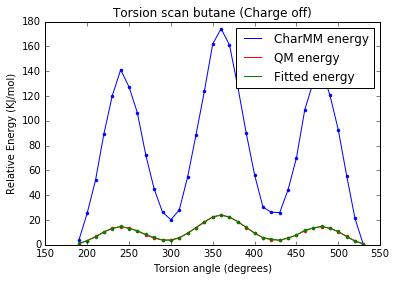

In [5]:
plt.plot(butane_scan.steps, butane_scan.mm_energy, 'b', label='CharMM energy')
plt.plot(butane_scan.steps, butane_scan.mm_energy, 'b.')
plt.plot(butane_scan.steps, butane_scan.qm_energy, 'r', label= 'QM energy')
plt.plot(butane_scan.steps, butane_scan.qm_energy, 'r.')
plt.plot(butane_scan.steps, db.mm_energy[-1], 'g', label='Fitted energy')
plt.plot(butane_scan.steps, db.mm_energy[-1], 'g.')
plt.ylabel('Relative Energy (KJ/mol)')
plt.xlabel('Torsion angle (degrees)')
plt.title('Torsion scan butane (Charge off)')
plt.legend()
plt.savefig('Torsion_scan.pdf')

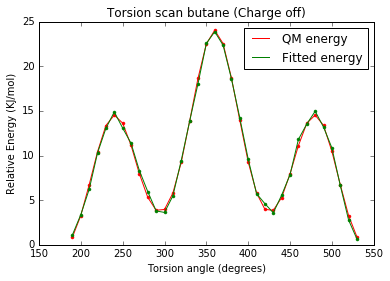

In [6]:
plt.plot(butane_scan.steps, butane_scan.qm_energy, 'r', label= 'QM energy')
plt.plot(butane_scan.steps, butane_scan.qm_energy, 'r.')
plt.plot(butane_scan.steps, db.mm_energy[-1], 'g', label='Fitted energy')
plt.plot(butane_scan.steps, db.mm_energy[-1], 'g.')
plt.ylabel('Relative Energy (KJ/mol)')
plt.xlabel('Torsion angle (degrees)')
plt.title('Torsion scan butane (Charge off)')
plt.legend()
plt.savefig('Torsion_scan_no_charmm.pdf')

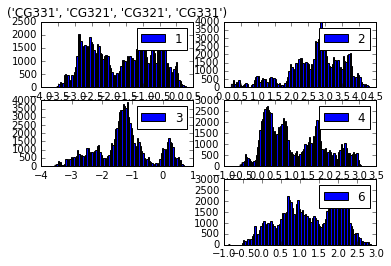

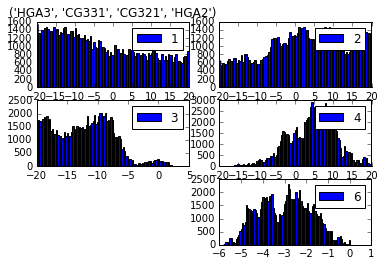

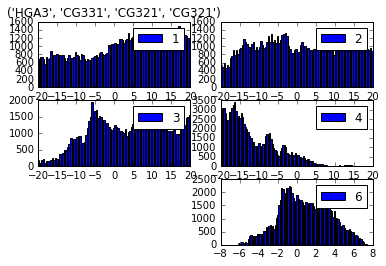

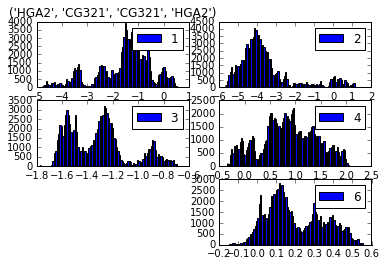

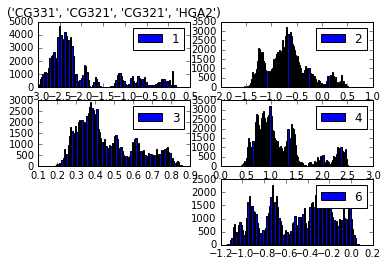

In [7]:
multiplicities = ['1', '2', '3', '4', '6']
with PdfPages('param_hist.pdf') as pdf:
    for torsion in param_to_opt:
        torsion_name = torsion[0] + '_' + torsion[1] + '_' + torsion[2] + '_' + torsion[3]
        for n, m in enumerate(multiplicities):
            if n==1:
                plt.title(torsion)
            plt.subplot(3, 2, int(m))
            k = torsion_name + '_' + m + '_K'
            plt.hist(getattr(db, k)[:], bins=100, label=m)
            plt.legend()
        pdf.savefig()
        plt.show()
        plt.close()
            
        